In [1]:
import pandas as pd

data_frame = pd.read_csv('scrape_results_21_04_20.csv') 


In [2]:
data_frame_references = data_frame[(data_frame['referred_by'] != '[]')|(data_frame['referring_to'] != '[]')]

data_frame_references

,published_date,title,respondent,summary,download_url,citation,case_number,referred_by,referring_to,enforcement
0,2020-03-19,Breach of the Protection Obligation by SSA Gro...,SSA Group International,A warning was issued to SSA Group Internationa...,https://www.pdpc.gov.sg/-/media/Files/PDPC/PDF...,NaN,DP-1909-B4729,[],"['[2018] SGPDPC 12','[2018] SGPDPC 21']",['warning']
1,2020-03-19,Breach of the Protection and Accountability Ob...,MCST 3593,Both MCST 3593 and New-E Security failed to pu...,https://www.pdpc.gov.sg/-/media/Files/PDPC/PDF...,[2020] SGPDPC 6,DP-1903-B3554,[],"['[2016] SGPDPC 1', '[2019] SGPDPC 23', '[2017...",[]
2,2020-03-19,Breach of the Protection and Accountability Ob...,MCST 4375,Both MCST 4375 and A Best Security Management ...,https://www.pdpc.gov.sg/-/media/Files/PDPC/PDF...,[2020] SGPDPC 4,DP-1903-B3437,[],"['[2017] SGPDPC 15', '[2019] SGPDPC 23', '[201...",[]
6,2020-02-11,Breach of the Protection Obligation by Royal C...,Royal Caribbean Cruises (Asia),"A financial penalty of $16,000 was imposed on ...",https://www.pdpc.gov.sg/-/media/Files/PDPC/PDF...,[2020] SGPDPC 5,DP-1904-B3721,[],"['[2016] SGPDPC 22', '[2019] SGPDPC 3', '[2019...","[['financial', 16000]]"
7,2020-02-11,Breach of the Protection Obligation by SPH Mag...,SPH Magazines,"A financial penalty of $26,000 was imposed on ...",https://www.pdpc.gov.sg/-/media/Files/PDPC/PDF...,[2020] SGPDPC 3,DP-1802-B1731,[],['[2016] SGPDPC 3'],"[['financial', 26000]]"
...,...,...,...,...,...,...,...,...,...,...
127,2016-07-21,Breach of Protection Obligation by Toh-Shi Pri...,Toh-Shi Printing Singapore,"A financial penalty of $5,000 was imposed on T...",https://www.pdpc.gov.sg/-/media/Files/PDPC/PDF...,[2016] SGPDPC 11,DP-1506-A456,"['[2017] SGPDPC 18', '[2017] SGPDPC 14', '[201...",[],"[['financial', 5000]]"
128,2016-06-24,Breach of Purpose Limitation Obligation by AIA...,AIA Singapore,A warning was issued to AIA Singapore for fail...,https://www.pdpc.gov.sg/-/media/Files/PDPC/PDF...,[2016] SGPDPC 10,DP-1509-A533,"['[2019] SGPDPC 16', '[2019] SGPDPC [7]', '[20...",[],['warning']
130,2016-04-21,Breach of Protection and Openness Obligations ...,K Box Entertainment Group and Finantech Holdings,"Financial penalties of $50,000 and $10,000 wer...",https://www.pdpc.gov.sg/-/media/Files/PDPC/PDF...,[2016] SGPDPC 1,DP-1409-A100,['[2020] SGPDPC 6'],[],[]
134,2016-04-21,Breach of Protection Obligation by Challenger ...,Challenger Technologies and Xirlynx Innovations,A warning was issued to Challenger Technologie...,https://www.pdpc.gov.sg/-/media/Files/PDPC/PDF...,[2016] SGPDPC 6,DP-1409-A103,"['[2019] SGPDPC 39', '[2019] SGPDPC [34]', '[2...",[],['warning']


In [3]:
import networkx as nx

In [4]:
graph = nx.Graph()         

nodes = []

for row in data_frame_references.itertuples():
    nodes.append((row.respondent, {'weight': len(row.referred_by)}))

graph.add_nodes_from(nodes)


In [5]:
for index, referring_list_str in data_frame_references['referring_to'].items():
    if referring_list_str != '[]':
        referring_items_str = referring_list_str.strip('[]').split(',')
        for referring_item_str in referring_items_str:
            referring_item = referring_item_str.strip().strip(r"'")
            import re
            referring_item = re.escape(referring_item)
            match = data_frame[data_frame['citation'].str.match(referring_item, na=False) == True]
            if match['respondent'].values.any():
                graph.add_edge(data_frame['respondent'].values[index], match['respondent'].values[0])


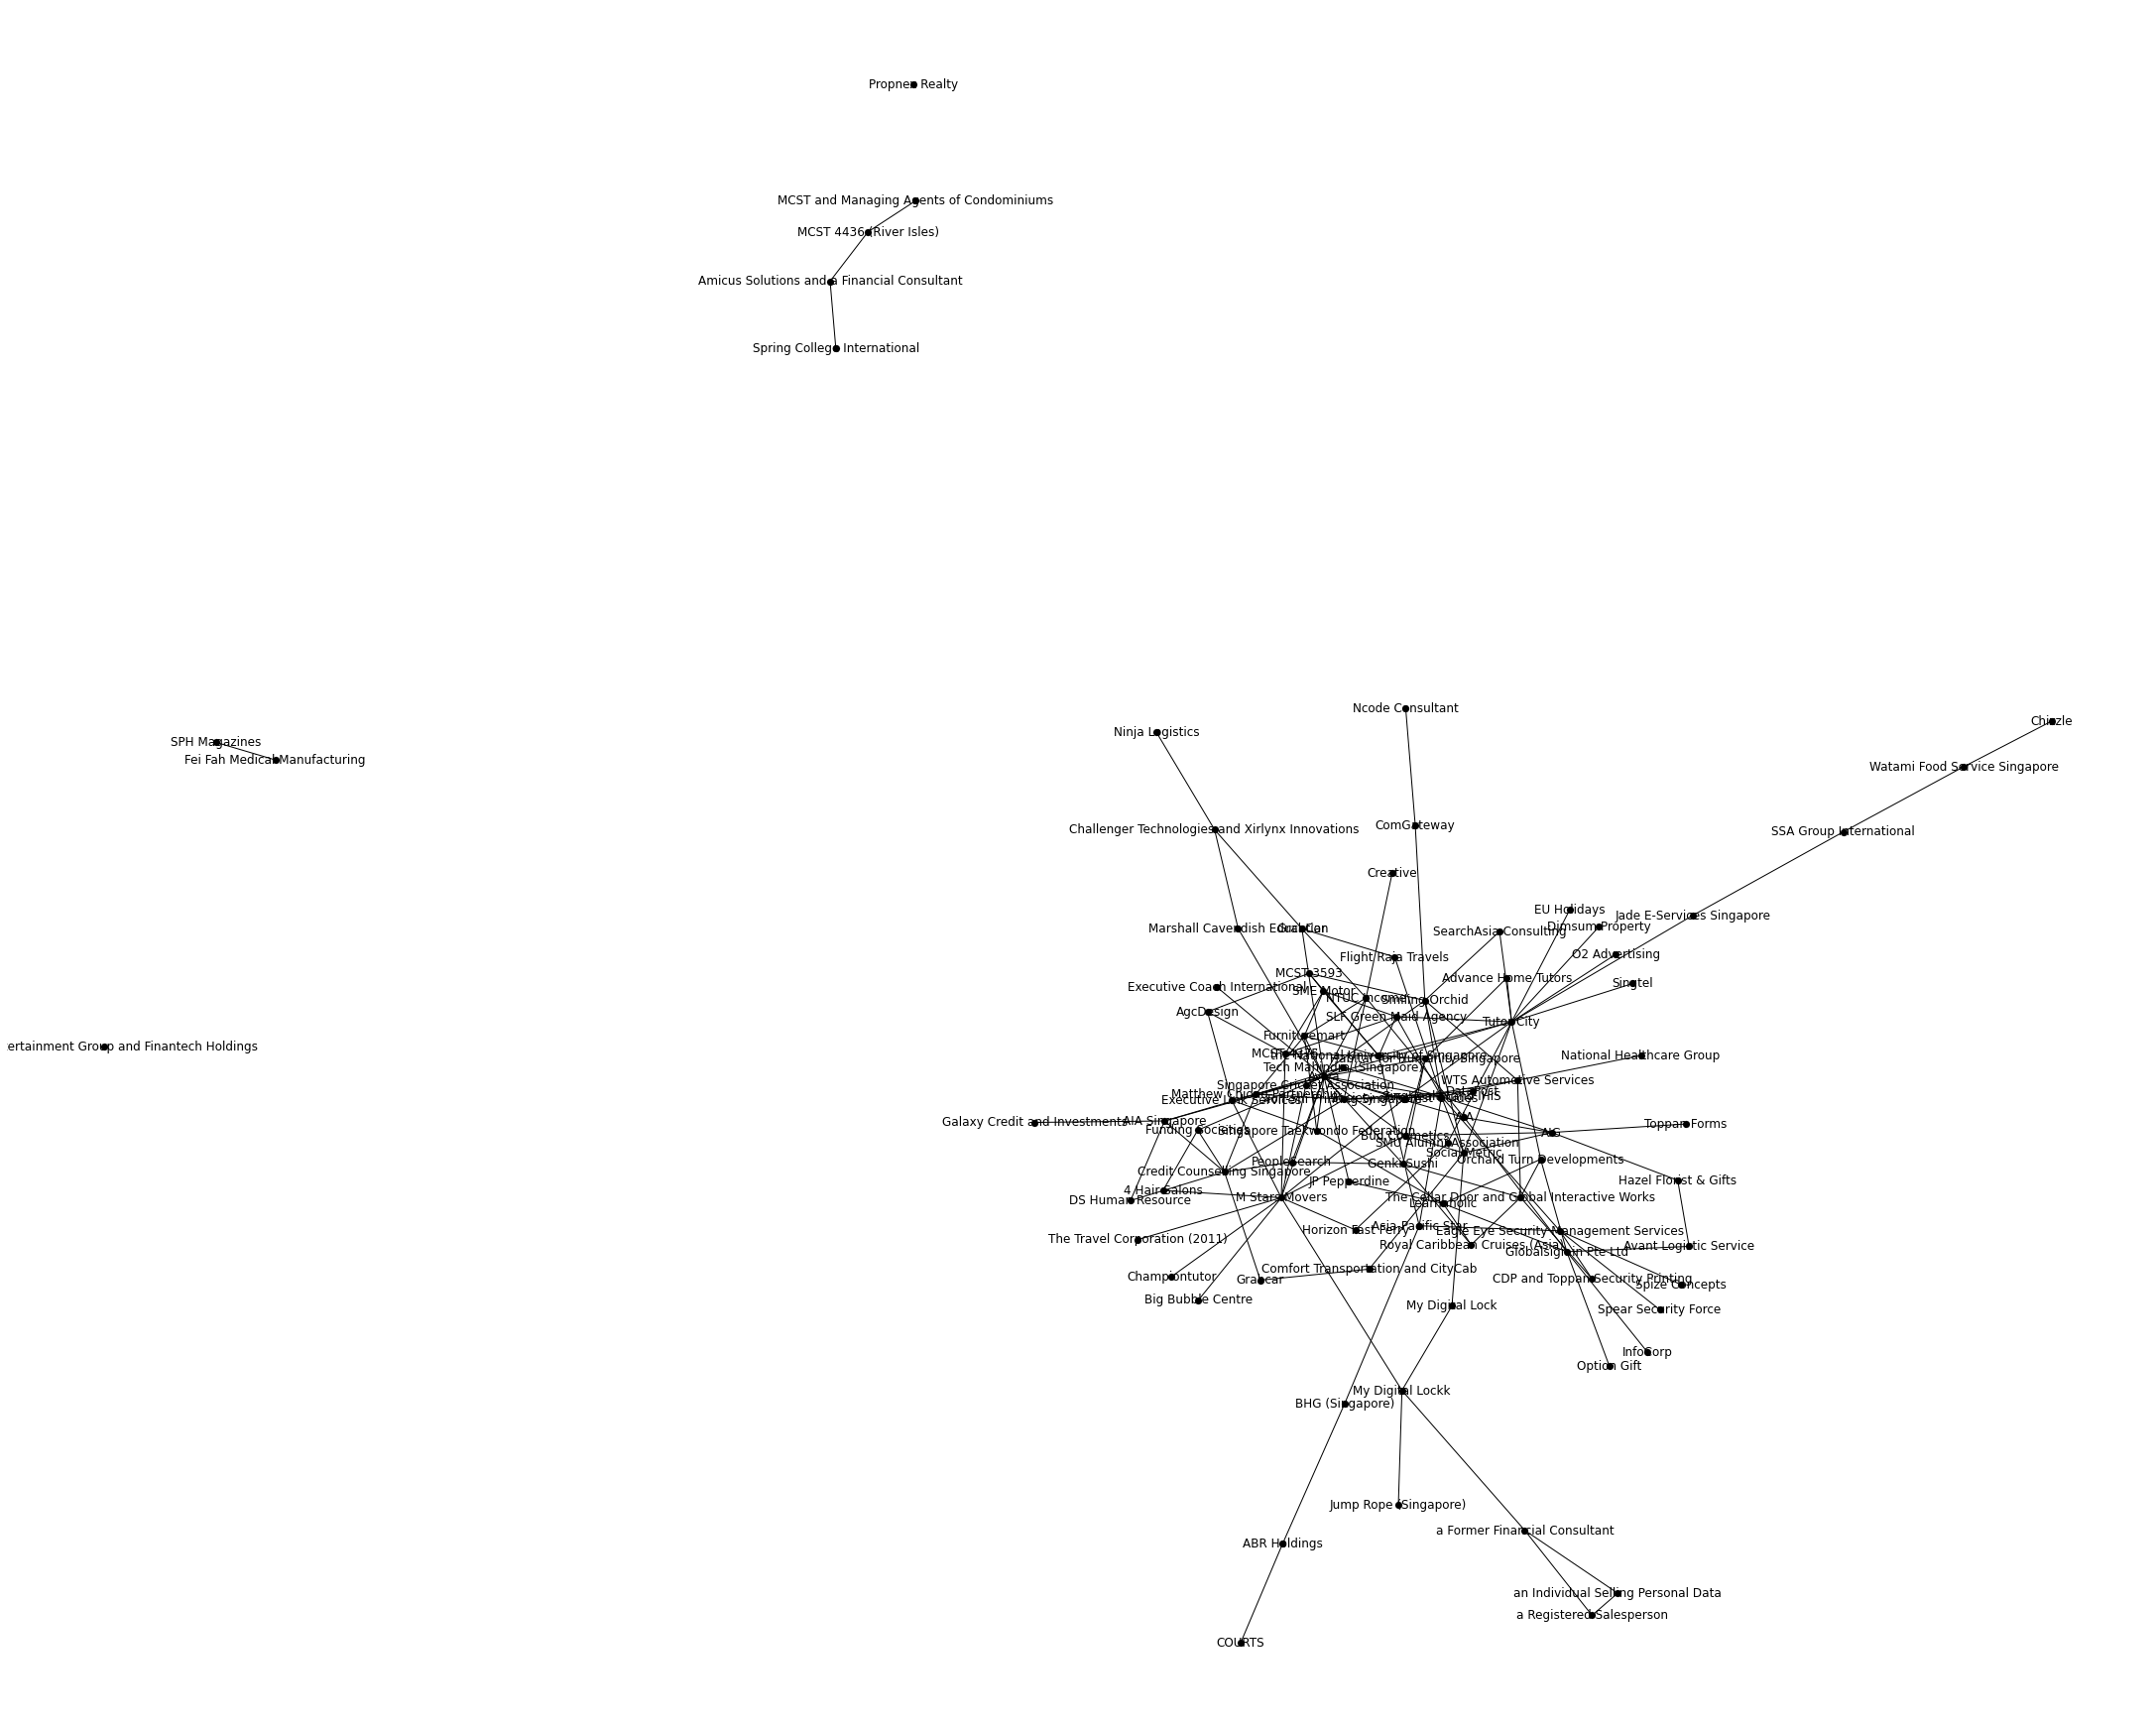

In [6]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches(30,24)

options = {
    'node_color': 'black',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0.1,
    'with_labels': True
}

nx.draw(graph, **options)

plt.savefig('graph.png', dpi=300)

In [7]:
nx.write_gexf(graph, "graph.gexf")

